In [1]:
import pandas as pd
import numpy as np

### `Importing data`

In [98]:
%cd C:\\Users\\naray\\Desktop\\Case Studies\\2. Walmart Stores Sales Forecast\\data

test=pd.read_csv("test.csv")
train=pd.read_csv("train.csv")
features=pd.read_csv("features.csv")
stores=pd.read_csv("stores.csv")

#drop obs where sales is <1 (dropping 0.5% of obs)
train=train[train['Weekly_Sales']>1]

C:\Users\naray\Desktop\Case Studies\2. Walmart Stores Sales Forecast\data


### `Concatenate train & test data and merging with stores & features`

In [3]:
test['Split']='test'
train['Split']='train'

df2 = pd.concat([train,test])

# Merging concatenated dataframe with stores & features dataframe

df1=pd.merge(df2,stores,how='left',left_on='Store',right_on='Store')

df=pd.merge(df1,features,how='left',left_on=['Store','Date'],right_on=['Store','Date'])

df.head(2)

C:\Users\naray\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


,Date,Dept,IsHoliday_x,Split,Store,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,2010-02-05,1,False,train,1,24924.50,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,2010-02-12,1,True,train,1,46039.49,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True


In [4]:
#removing the duplicate holiday column after merging

df.drop('IsHoliday_x',axis=1,inplace=True)
df.rename(columns={'IsHoliday_y':'IsHoliday'},inplace=True)

# Replacing NaN with 0 in Markdown columns
df['MarkDown1'].fillna(0,inplace=True)
df['MarkDown2'].fillna(0,inplace=True)
df['MarkDown3'].fillna(0,inplace=True)
df['MarkDown4'].fillna(0,inplace=True)
df['MarkDown5'].fillna(0,inplace=True)

### `Exploratory Analysis`

In [5]:
df.describe()

,Dept,Store,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,534459.000000,534459.000000,419395.000000,534459.000000,534459.000000,534459.000000,534459.000000,534459.000000,534459.000000,534459.000000,534459.000000,496297.000000,496297.000000
mean,44.254289,22.202334,16064.346832,136698.307124,58.752334,3.408307,3685.612868,1294.655562,841.762315,1491.934527,2148.419215,172.097682,7.791017
std,30.532750,12.791609,22740.591920,61013.063813,18.679430,0.430774,7600.776217,5714.306960,7874.256086,4871.506071,9802.640535,39.544192,1.865640
min,1.000000,1.000000,1.010000,34875.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.000000,-185.170000,126.064000,3.684000
25%,18.000000,11.000000,2144.190000,93638.000000,45.220000,3.041000,0.000000,0.000000,0.000000,0.000000,0.000000,132.521867,6.623000
50%,37.000000,22.000000,7695.960000,140167.000000,60.040000,3.523000,0.000000,0.000000,0.000000,0.000000,0.000000,182.442420,7.795000
75%,74.000000,33.000000,20307.955000,202505.000000,73.200000,3.744000,5051.870000,119.770000,29.280000,906.450000,2852.910000,213.748126,8.549000
max,99.000000,45.000000,693099.360000,219622.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [6]:
df.isnull().sum()

Date                 0
Dept                 0
Split                0
Store                0
Weekly_Sales    115064
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1            0
MarkDown2            0
MarkDown3            0
MarkDown4            0
MarkDown5            0
CPI              38162
Unemployment     38162
IsHoliday            0
dtype: int64

In [17]:
import pandas_profiling
pandas_profiling.ProfileReport(df)

Number of variables,17
Number of observations,536634
Total Missing (%),2.1%
Total size in memory,70.1 MiB
Average record size in memory,137.0 B
Numeric,13
Categorical,3
Boolean,1
Date,0
Text (Unique),0
Rejected,0


In [7]:
#   There appears to be some outliers in our data. Let's take a bit of a closer look at these

df.loc[df['Weekly_Sales'] >300000]

,Date,Dept,Split,Store,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
30359,2011-12-23,7,train,4,318422.01,A,205863,35.92,3.103,2461.94,69.05,2938.24,52.00,4396.76,129.984548,5.143,False
37066,2010-11-26,72,train,4,381072.11,A,205863,48.08,2.752,0.00,0.00,0.00,0.00,0.00,126.669267,7.127,True
37118,2011-11-25,72,train,4,385051.04,A,205863,47.96,3.225,561.45,137.88,83340.33,44.04,9239.23,129.836400,5.143,True
56207,2010-11-26,72,train,6,342578.65,A,202505,65.79,2.735,0.00,0.00,0.00,0.00,0.00,213.267296,7.007,True
56259,2011-11-25,72,train,6,326866.60,A,202505,62.78,3.236,429.03,171.88,83192.81,15.00,986.23,220.041741,6.551,True
88097,2010-12-24,7,train,10,406988.63,B,126512,57.06,3.236,0.00,0.00,0.00,0.00,0.00,126.983581,9.003,False
88149,2011-12-23,7,train,10,341308.00,B,126512,48.36,3.541,300.02,77.73,2432.01,108.37,4078.21,129.984548,7.874,False
95005,2010-11-26,72,train,10,693099.36,B,126512,55.33,3.162,0.00,0.00,0.00,0.00,0.00,126.669267,9.003,True
95009,2010-12-24,72,train,10,404245.03,B,126512,57.06,3.236,0.00,0.00,0.00,0.00,0.00,126.983581,9.003,False
95057,2011-11-25,72,train,10,630999.19,B,126512,60.68,3.760,174.72,329.00,141630.61,79.00,1009.98,129.836400,7.874,True


    It appears to be quite obvious. The end of November sees a lot of exceptionally large sales. This special day, better known as Black friday, causes sales to be on fire, and undoubtedly a dummy variable should be created for this day. Also, Christmas, appears here and there. Since it is not considered holiday, we will also make a dummy for this day. Let's see if we should consider some other special days as well

In [8]:
df.loc[df['Weekly_Sales'] >220000,"Date"].value_counts()

2011-11-25    26
2010-12-24    25
2010-11-26    25
2011-12-23    14
2010-12-17     3
2010-02-05     2
2011-08-26     1
2012-02-10     1
2010-12-10     1
2012-04-06     1
2011-12-09     1
2011-10-07     1
2011-02-11     1
Name: Date, dtype: int64

    Except for a handful spurious other dates, it appears that the two days before Christmas and Black Friday will do the job.

### `Categorical variables treatment`

In [9]:
df_cat=df[['Dept','Store','Type','IsHoliday','Date']]

In [10]:
df_cat.dtypes

Dept          int64
Store         int64
Type         object
IsHoliday      bool
Date         object
dtype: object

In [11]:
# Creating a variable called 'special_days' to include blackfriday and pre-christmas 

df['Date']=df['Date'].astype('category')

di={'2011-11-25':'Blackfriday','2010-11-26':'Blackfriday','2010-12-24':'Christmas','2011-12-23':'Christmas'}

df_cat['special_days']=df_cat['Date'].map(di)

df_cat['special_days'].fillna('No',inplace=True)

df_cat['special_days'].value_counts()

C:\Users\naray\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\naray\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


No             522550
Christmas        5966
Blackfriday      5943
Name: special_days, dtype: int64

In [12]:
# Extracting month from Date variable
import datetime
df_cat['Date'] = pd.to_datetime(df_cat['Date'],format='%Y-%m-%d')

df_cat['Month']=df_cat['Date'].dt.month

df_cat.drop(['Date'],axis=1,inplace=True)

C:\Users\naray\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\naray\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\naray\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-do

In [13]:
df_cat.head()

,Dept,Store,Type,IsHoliday,special_days,Month
0,1,1,A,False,No,2
1,1,1,A,True,No,2
2,1,1,A,False,No,2
3,1,1,A,False,No,2
4,1,1,A,False,No,3


In [14]:
# Creating dummy variables
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname)
    col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df


In [15]:
for c_feature in ['Type','Store','Dept','IsHoliday','Month','special_days']:
    df_cat[c_feature] = df_cat[c_feature].astype('category')
    df_cat = create_dummies(df_cat , c_feature )

C:\Users\naray\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [16]:
df_cat.head()

,Type_B,Type_C,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9,...,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,special_days_Christmas,special_days_No
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### `Numerical variables treatment`

In [17]:
num_vars=df.columns.difference(['Date','Type','Store','Dept','IsHoliday','Split'])

In [18]:
df_num=df[num_vars]

In [19]:
df_num.head(2)

,CPI,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Size,Temperature,Unemployment,Weekly_Sales
0,211.096358,2.572,0.0,0.0,0.0,0.0,0.0,151315,42.31,8.106,24924.50
1,211.242170,2.548,0.0,0.0,0.0,0.0,0.0,151315,38.51,8.106,46039.49


In [20]:
df_num.isnull().sum()

CPI              38162
Fuel_Price           0
MarkDown1            0
MarkDown2            0
MarkDown3            0
MarkDown4            0
MarkDown5            0
Size                 0
Temperature          0
Unemployment     38162
Weekly_Sales    115064
dtype: int64

In [21]:
df_num.dtypes

CPI             float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
Size              int64
Temperature     float64
Unemployment    float64
Weekly_Sales    float64
dtype: object

In [22]:
# Outlier treatment

# def outlier_capping(x):
#     x=x.clip_upper(x.quantile(0.99))
#     x=x.clip_lower(x.quantile(0.01))
#     return x

# df_num=df_num.apply(lambda x:outlier_capping(x))

In [23]:
# Missing value treatment

df_num['CPI']=df_num['CPI'].fillna(df_num['CPI'].mean())

df_num['Unemployment']=df_num['Unemployment'].fillna(df_num['Unemployment'].mean())

C:\Users\naray\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\naray\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


### `Merging num and cat dataframes`

In [24]:
df=pd.concat([df_num,df_cat,df['Split']],axis=1)

In [25]:
df.head(2)

,CPI,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Size,Temperature,Unemployment,...,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,special_days_Christmas,special_days_No,Split
0,211.096358,2.572,0.0,0.0,0.0,0.0,0.0,151315,42.31,8.106,...,0,0,0,0,0,0,0,0,1,train
1,211.242170,2.548,0.0,0.0,0.0,0.0,0.0,151315,38.51,8.106,...,0,0,0,0,0,0,0,0,1,train


In [26]:
df.shape

(534459, 152)

### `Splitting train & test data`

In [27]:
df_train=df[df['Split']=='train']
df_train.drop('Split',axis=1,inplace=True)

df_test=df[df['Split']=='test']
df_test.drop('Split',axis=1,inplace=True)

### `Assumption 1 - Residuals or Y should be normally distributed`

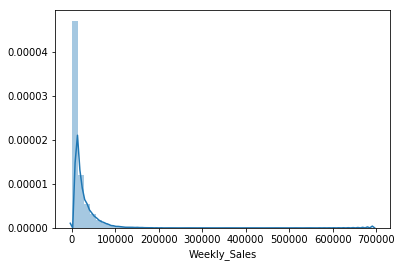

In [29]:
import seaborn as sns
sns.distplot(df_train.Weekly_Sales)

#### ` Box-cox tranformation of Y to make it follow normal distribution`

In [30]:
from scipy import stats

# transform training data & save lambda value
df_train['bc_Weekly_Sales'],fitted_lambda = stats.boxcox(df_train['Weekly_Sales'])

# df_train['Weekly_Sales']=np.sqrt(df_train['Weekly_Sales'])

C:\Users\naray\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


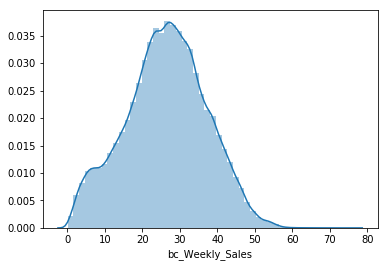

In [31]:
sns.distplot(df_train.bc_Weekly_Sales)

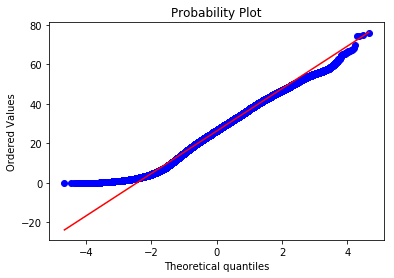

In [32]:
from scipy import stats
import pylab

stats.probplot(df_train.bc_Weekly_Sales, dist="norm", plot=pylab )
pylab.show()

In [33]:
# df_train[['Weekly_Sales','bc_Weekly_Sales']][df_train['Weekly_Sales']<1.1].sort_values(by='Weekly_Sales',axis=0)

In [34]:
# Since log of weekly_sales (ln_weekly_sales) appears to be more close to normal distribution, We will use it as dependent -
#  - variable instead of actual weekly_sales

df_train.drop('Weekly_Sales',axis=1,inplace=True)

C:\Users\naray\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


### `Random Forest for variable selection`

In [35]:
feature_columns=df_train.columns.difference(['bc_Weekly_Sales'])

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
train_x,test_x,train_y,test_y=train_test_split(df_train[feature_columns],
                                              df_train['bc_Weekly_Sales'],
                                              test_size=.2,
                                              random_state=12)

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [39]:
param_grid={'n_estimators':np.arange(10,25)}

tree=GridSearchCV(RandomForestRegressor(oob_score=False,warm_start=True),param_grid,cv=2,n_jobs=-1)
tree.fit(train_x,train_y)  

GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=True),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [40]:
tree.best_params_

{'n_estimators': 24}

In [41]:
rf_model=RandomForestRegressor(oob_score=True,n_estimators=24,n_jobs=-1)
rf_model.fit(train_x,train_y)

C:\Users\naray\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=24, n_jobs=-1,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [42]:
indices = np.argsort(rf_model.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(train_x.shape[1]):
  feature_rank.loc[f] = [f+1,
                         train_x.columns[indices[f]],
                         rf_model.feature_importances_[indices[f]]]

In [43]:
feature_rank.head(50)

,rank,feature,importance
0,1,Size,0.131886
1,2,Dept_92,0.043504
2,3,Dept_95,0.043484
3,4,Dept_38,0.040003
4,5,Dept_54,0.039362
5,6,Dept_40,0.028215
6,7,Dept_2,0.026358
7,8,Dept_60,0.025681
8,9,Dept_72,0.024286
9,10,Dept_90,0.023799


In [50]:
# Extract 50 features based on their importance
x=feature_rank.loc[0:50,['feature']]
x=x['feature'].tolist()
print(x)

['Size', 'Dept_92', 'Dept_95', 'Dept_38', 'Dept_54', 'Dept_40', 'Dept_2', 'Dept_60', 'Dept_72', 'Dept_90', 'Dept_94', 'Dept_59', 'Dept_45', 'Dept_93', 'Dept_28', 'Dept_91', 'Dept_8', 'Dept_13', 'Type_B', 'Dept_4', 'Dept_51', 'Dept_80', 'Dept_79', 'CPI', 'Dept_98', 'Temperature', 'Dept_41', 'Dept_19', 'Dept_27', 'Dept_36', 'Dept_97', 'Dept_83', 'Dept_96', 'Dept_46', 'Dept_81', 'Dept_7', 'Dept_52', 'Dept_56', 'Dept_85', 'Dept_82', 'Dept_31', 'Unemployment', 'Dept_5', 'Dept_35', 'Dept_23', 'Store_10', 'Dept_48', 'Month_12', 'Dept_58', 'Dept_9', 'Fuel_Price']


In [51]:
# Create df with selected features
rf_features=['Size', 'Dept_92', 'Dept_95', 'Dept_38', 'Dept_54', 'Dept_40', 'Dept_2', 'Dept_60', 'Dept_72', 'Dept_90', 'Dept_94',
          'Dept_59', 'Dept_45', 'Dept_93', 'Dept_28', 'Dept_91', 'Dept_8', 'Dept_13', 'Type_B', 'Dept_4', 'Dept_51', 'Dept_80',
          'Dept_79', 'CPI', 'Dept_98', 'Temperature', 'Dept_41', 'Dept_19', 'Dept_27', 'Dept_36', 'Dept_97', 'Dept_83', 
          'Dept_96', 'Dept_46', 'Dept_81', 'Dept_7', 'Dept_52', 'Dept_56', 'Dept_85', 'Dept_82', 'Dept_31', 'Unemployment', 
          'Dept_5', 'Dept_35', 'Dept_23', 'Store_10', 'Dept_48', 'Month_12', 'Dept_58', 'Dept_9', 'Fuel_Price']

rf_features.append('bc_Weekly_Sales')
df_rf=df_train[rf_features]

df_rf.head(5)

,Size,Dept_92,Dept_95,Dept_38,Dept_54,Dept_40,Dept_2,Dept_60,Dept_72,Dept_90,...,Dept_5,Dept_35,Dept_23,Store_10,Dept_48,Month_12,Dept_58,Dept_9,Fuel_Price,bc_Weekly_Sales
0,151315,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2.572,35.358353
1,151315,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2.548,40.898539
2,151315,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2.514,39.931918
3,151315,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2.561,33.295772
4,151315,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2.625,34.252018


### `Multicollinearity check`

In [52]:
import statsmodels as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [53]:
del rf_features[-1]

In [54]:
%%capture
#gather features
features = "+".join(rf_features)


In [55]:
features

'Size+Dept_92+Dept_95+Dept_38+Dept_54+Dept_40+Dept_2+Dept_60+Dept_72+Dept_90+Dept_94+Dept_59+Dept_45+Dept_93+Dept_28+Dept_91+Dept_8+Dept_13+Type_B+Dept_4+Dept_51+Dept_80+Dept_79+CPI+Dept_98+Temperature+Dept_41+Dept_19+Dept_27+Dept_36+Dept_97+Dept_83+Dept_96+Dept_46+Dept_81+Dept_7+Dept_52+Dept_56+Dept_85+Dept_82+Dept_31+Unemployment+Dept_5+Dept_35+Dept_23+Store_10+Dept_48+Month_12+Dept_58+Dept_9+Fuel_Price'

In [56]:
# get y and X dataframes based on this regression:
y, X = dmatrices('bc_Weekly_Sales~' + features,df_rf, return_type='dataframe')

In [57]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [58]:
vif.sort_values(by=['VIF Factor'],ascending=False)

,VIF Factor,features
0,149.457699,Intercept
19,1.391793,Type_B
1,1.325296,Size
26,1.283806,Temperature
24,1.270565,CPI
42,1.160569,Unemployment
48,1.122813,Month_12
46,1.111257,Store_10
51,1.086493,Fuel_Price
36,1.021013,Dept_7


### `Assumption 3 - All x variables should have a linear relationship with Y`

In [71]:
import seaborn as sns

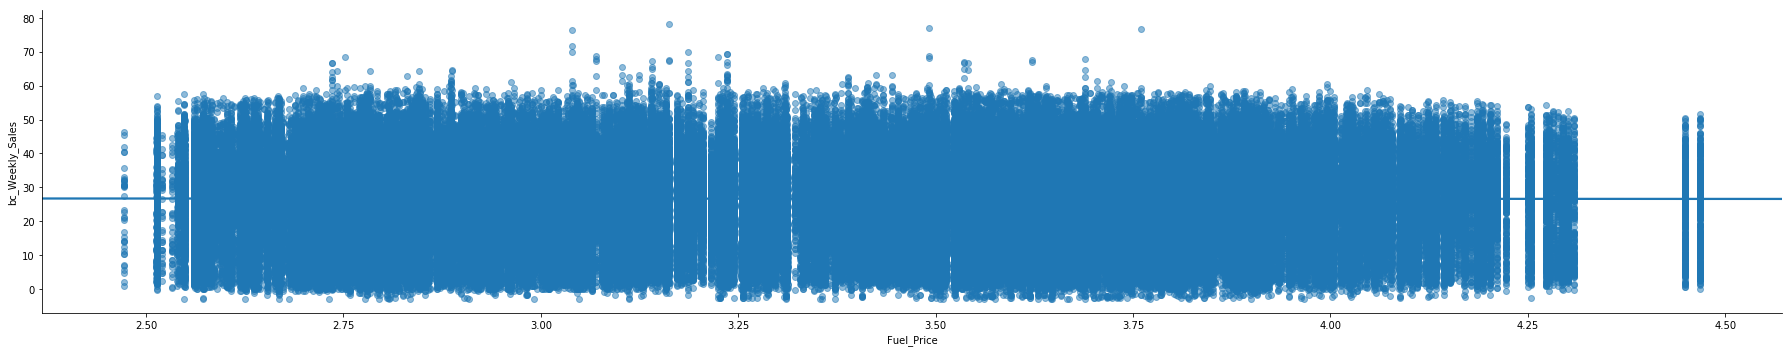

In [132]:
sns.lmplot(x="Fuel_Price",y="bc_Weekly_Sales",data=df_rf,aspect=5,scatter_kws={'alpha':0.5})

###  `Splitting data for training and testing`

In [59]:
from sklearn.model_selection import train_test_split

feature_columns=df_rf.columns.difference(['bc_Weekly_Sales'])

train_x,test_x,train_y,test_y=train_test_split(df_rf[feature_columns],
                                              df_rf['bc_Weekly_Sales'],
                                              test_size=.2,
                                              random_state=42)

### `Building Linear Regression Model`

In [60]:
import statsmodels.api as sm

In [61]:
train_x = sm.add_constant(train_x)
test_x=sm.add_constant(test_x)
lm=sm.OLS(train_y,train_x).fit()

C:\Users\naray\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [62]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:        bc_Weekly_Sales   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                 1.391e+04
Date:                Wed, 04 Sep 2019   Prob (F-statistic):               0.00
Time:                        19:27:03   Log-Likelihood:            -1.0837e+06
No. Observations:              335516   AIC:                         2.168e+06
Df Residuals:                  335464   BIC:                         2.168e+06
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           16.9954      0.129    131.686   

In [63]:
print('Parameters: ', lm.params)
print('R2: ', lm.rsquared)

Parameters:  const           16.995361
CPI             -0.006538
Dept_13         11.821632
Dept_19        -10.242962
Dept_2          14.720584
Dept_23          7.156216
Dept_27         -8.907443
Dept_28        -11.990306
Dept_31         -7.074730
Dept_35         -5.904732
Dept_36         -8.511768
Dept_38         18.797406
Dept_4          10.581968
Dept_40         15.371083
Dept_41         -9.283037
Dept_45        -22.025504
Dept_46          7.791073
Dept_48        -11.324632
Dept_5           6.262078
Dept_51        -22.360270
Dept_52         -7.890837
Dept_54        -19.196855
Dept_56         -6.720906
Dept_58         -6.456951
Dept_59        -13.200989
Dept_60        -13.356739
Dept_7           6.748630
Dept_72         12.926840
Dept_79          8.738452
Dept_8          11.346374
Dept_80          0.562537
Dept_81          5.978037
Dept_82          6.137610
Dept_83         -4.869130
Dept_85         -6.835248
Dept_9           5.127192
Dept_90         13.757893
Dept_91         10.508327

### `Evaluating Model Accuracy |R sq - 68%|`

In [64]:
test_pred=lm.predict(test_x)
train_pred=lm.predict(train_x)

# test_pred_rf=rf_model.predict(test_x)
# train_pred_rf=rf_model.predict(train_x)

In [65]:
from sklearn import metrics

print('MSE Test:',metrics.mean_squared_error(test_y,test_pred))
print('MSE Train:',metrics.mean_squared_error(train_y,train_pred))

MSE Test: 37.40515100254869
MSE Train: 37.42381417739725


    Since the error on training & testing are very close, we assume that our model is optimally fitted.

In [66]:
print ('MAE:', metrics.mean_absolute_error(test_y, test_pred))
print ('MSE:', metrics.mean_squared_error(test_y, test_pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(test_y, test_pred)))

MAE: 4.4973099701396855
MSE: 37.40515100254869
RMSE: 6.115975065559758


In [67]:
MAPE_train = '%.3f' % np.mean(np.abs(train_y-train_pred)/(train_y))
MAPE_test = '%.3f' % np.mean(np.abs(test_y-test_pred)/(test_y))

# print the values of MAPE for train and test
print('MAPE of training data: ', MAPE_train,  ' | ', 'MAPE of testing data: ', MAPE_test)

MAPE of training data:  0.413  |  MAPE of testing data:  0.416


### `Assumption - Normality of residuals (histogram/ Q-Q plot)`

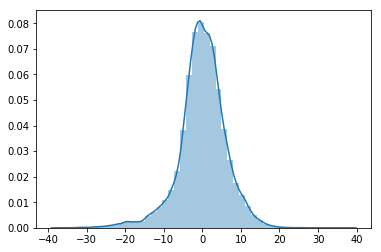

In [68]:
residuals=train_y-train_pred

import seaborn as sns

sns.distplot(residuals)

#### `To ensure residuals are random i.e. normally distributed, we use a Q-Q plot`

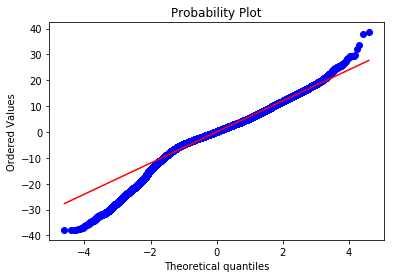

In [69]:
from scipy import stats
import pylab

stats.probplot(residuals,dist='norm',plot=pylab)
pylab.show()

    From the above histogram and Q-Q plot it shows that residuals are normally distributed, hence we assume that this 
    assumption is not violated.

### `Assumption - Heteroscedasticity`

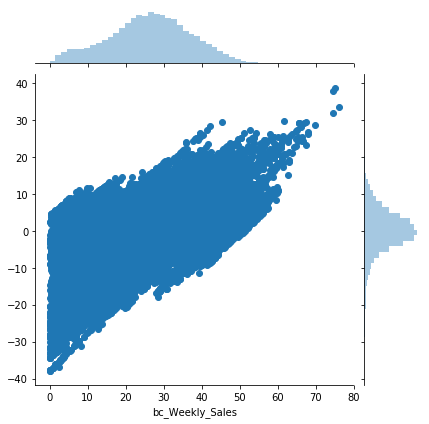

In [70]:
sns.jointplot(train_y,residuals)

    From the above plot, it shows that the relationship between residuals and Y is linear, hence we assume that this 
    assumption not violated.

### `Predicting sales on testing data & storing output`

In [136]:
df_test.head(2)

,CPI,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Size,Temperature,Unemployment,...,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,special_days_Christmas,special_days_No
419395,223.462779,3.386,6766.44,5147.70,50.82,3639.90,2737.42,151315,55.32,6.573,...,0,0,0,0,0,0,1,0,0,1
419396,223.481307,3.314,11421.32,3370.89,40.28,4646.79,6154.16,151315,61.24,6.573,...,0,0,0,0,0,0,1,0,0,1


In [138]:
# Keeping only selected features and adding constant
df_test1=df_test[feature_columns]

df_test1=sm.add_constant(df_test1)

df_test1.head(2)

,const,CPI,Dept_13,Dept_19,Dept_2,Dept_23,Dept_27,Dept_28,Dept_31,Dept_35,...,Dept_96,Dept_97,Dept_98,Fuel_Price,Month_12,Size,Store_10,Temperature,Type_B,Unemployment
419395,1.0,223.462779,0,0,0,0,0,0,0,0,...,0,0,0,3.386,0,151315,0,55.32,0,6.573
419396,1.0,223.481307,0,0,0,0,0,0,0,0,...,0,0,0,3.314,0,151315,0,61.24,0,6.573


In [140]:
# Making final prediction on test file
from scipy.special import boxcox, inv_boxcox

pred_sales=inv_boxcox(lm.predict(df_test1),fitted_lambda)
pred_sales=pd.DataFrame(pred_sales.tolist())
pred_sales.columns = ['Final_predicted_sales']


#Concatenating final prediction with original test file
testfile = pd.concat([test, pred_sales], axis=1)

testfile.head()

,Store,Dept,Date,IsHoliday,Final_predicted_sales
0,1,1,2012-11-02,False,5597.441130
1,1,1,2012-11-09,False,5664.273863
2,1,1,2012-11-16,False,5639.812837
3,1,1,2012-11-23,True,5677.414161
4,1,1,2012-11-30,False,5654.996160


In [141]:
#Exporting testfile to csv for final submission
%cd C:\Users\naray\Desktop\Case Studies\2. Walmart Stores Sales Forecast

testfile.to_csv('testfile_submission.csv',index=False)

C:\Users\naray\Desktop\Case Studies\2. Walmart Stores Sales Forecast
